In [1]:
import pickle

import numpy as np
import pandas as pd
from biopandas.pdb import PandasPdb
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

from mymodule import base_feature, except_outlier, pre_train_test, spearman_and_mse

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
base_df = pd.read_csv('dataset/featured//base.csv')
base_df

,seq_id,protein_sequence,pH,data_source,tm,sequence_len,A,B,C,D,...,Q,R,S,T,U,V,W,X,Y,Z
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341,45,0,1,13,...,6,25,11,14,0,37,4,0,3,0
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286,28,0,0,10,...,22,30,14,12,0,13,3,0,3,0
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497,50,0,9,27,...,25,31,33,30,0,30,3,0,16,0
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265,20,0,5,19,...,9,10,16,19,0,14,3,0,4,0
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451,86,0,14,78,...,54,63,148,120,0,124,16,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8,549,33,0,12,38,...,24,42,33,18,0,42,13,0,18,0
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2,469,37,0,5,21,...,16,25,37,26,0,34,5,0,14,0
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6,128,13,0,1,7,...,8,3,10,6,0,7,4,0,4,0
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7,593,47,0,5,34,...,12,25,51,32,0,48,3,0,18,0


In [5]:
pd.set_option('display.max_rows', 10)
base_df.describe().T

,count,mean,std,min,25%,50%,75%,max
seq_id,31390.0,15694.500000,9061.656811,0.00,7847.25,15694.5,23541.75,31389.0
pH,31104.0,6.892339,1.612225,1.99,7.00,7.0,7.00,64.9
tm,31390.0,49.147337,14.010089,-1.00,42.10,48.0,53.80,130.0
sequence_len,31390.0,447.669513,640.728935,5.00,197.00,336.0,523.00,32767.0
A,31390.0,34.297579,43.774015,0.00,15.00,26.0,43.00,1989.0
...,...,...,...,...,...,...,...,...
V,31390.0,29.247372,53.060187,0.00,13.00,22.0,35.00,3091.0
W,31390.0,5.025613,8.888754,0.00,1.00,3.0,6.00,456.0
X,31390.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.0
Y,31390.0,13.266518,18.562705,0.00,6.00,10.0,17.00,948.0


In [6]:
base_df['protein_sequence'][1]

'AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSRLQAQRRAQRVAWEDGDENVGQTVIPAQEEEGIEKPAEVHPTGKIGAKKLRKLEEKQARKAQREAEEAEREERKRLESQREAEWKKEEERLRLKEEQKEEEERKAQEEQARREHEEYLKLKEAFVVEEEGVSETMTEEQSHSFLTEFINYIKKSKVVLLEDLAFQMGLRTQDAINRIQDLLTEGTLTGVIDDRGKFIYITPEELAAVANFIRQRGRVSITELAQASNSLISWGQDLPAQAS'

<AxesSubplot:xlabel='tm', ylabel='Count'>

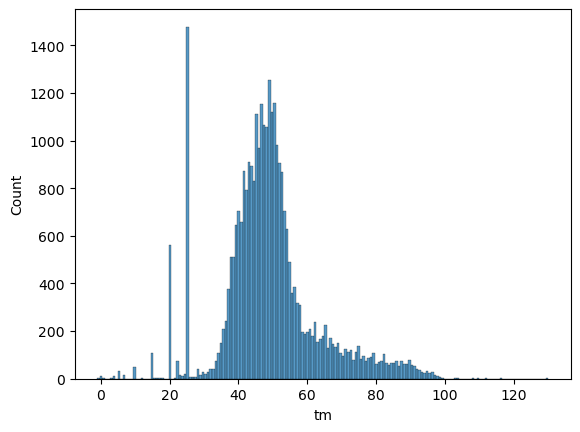

In [7]:
sns.histplot(data = base_df , x="tm")

50度付近の失活温度が最も多い

<AxesSubplot:xlabel='tm', ylabel='sequence_len'>

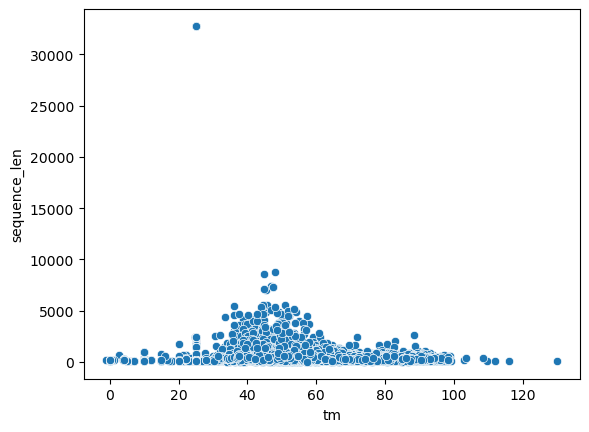

In [8]:
sns.scatterplot(data=base_df , x='tm', y='sequence_len')

失活温度と分子長の長さにはあまり関係がないように思える

<AxesSubplot:xlabel='sequence_len', ylabel='Count'>

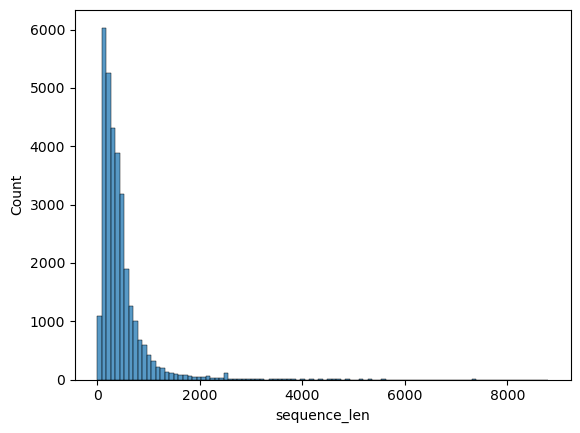

In [9]:
rate = base_df['sequence_len'].quantile(1.0)
trg = base_df['sequence_len'][base_df['sequence_len'] < rate]
sns.histplot(trg, bins=100)

外れ値を除いた値

/Users/lino/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sequence_len'>

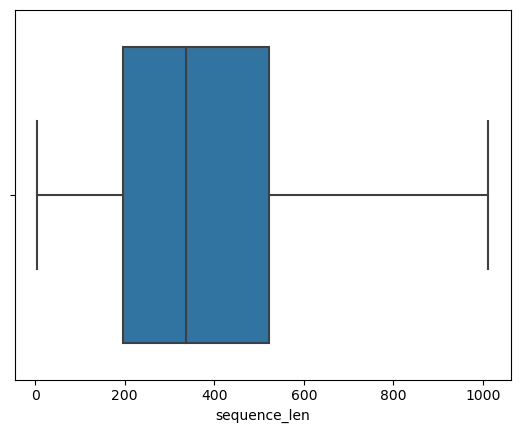

In [10]:
rate = base_df['sequence_len'].quantile(1.0)
trg = base_df['sequence_len'][base_df['sequence_len'] < rate]
sns.boxplot(trg, sym='')

1011


<AxesSubplot:xlabel='sequence_len', ylabel='Count'>

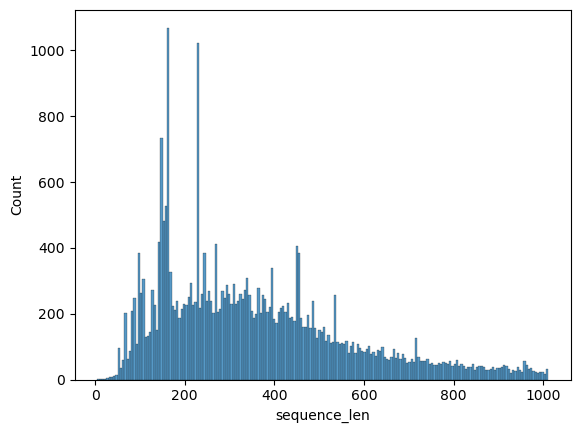

In [11]:
base_df['sequence_len'].describe()
q = base_df['sequence_len'].describe()
outlier = q.loc['75%'] + (q.loc['75%'] - q.loc['25%']) * 1.5
outlier
trg_outlier = base_df['sequence_len'][base_df['sequence_len'] < outlier]
print(trg_outlier.max())
sns.histplot(trg_outlier, bins=200)

In [22]:
import pickle
from sklearn.preprocessing import OneHotEncoder

string = "ACDEFGHIKLMNPQRSTVWY"
X = np.array([i for i in string]).reshape(-1,1)

enc = OneHotEncoder(categories="auto", sparse=False, dtype=np.float32)
amino = enc.fit_transform(X)

amino_dic = {i: j for i, j in zip(X.reshape(-1), amino)}
featured = []
for amino in base_df['protein_sequence']:
    oh_amino = []
    for i in X.reshape(-1):
        oh_amino.append(amino_dic[i])
    featured.append(oh_amino)
featured = np.array(featured)


with open('dataset/featured/oh_protein.pkl', 'wb') as f:
    pickle.dump(featured, f)
with open('dataset/featured/oh_protein.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
def one_hot_protein(df, name, save=False):
    """
    df: df['protein_sequence']
    name: string (pickle_name)
    """
    string = "ACDEFGHIKLMNPQRSTVWY"
    kinds = np.array([i for i in string]).reshape(-1,1)

    enc = OneHotEncoder(categories="auto", sparse=False, dtype=np.float32)
    encoded = enc.fit_transform(kinds)

    amino_dic = {i: j for i, j in zip(kinds.reshape(-1), encoded)}
    featured = []
    for protein in df['protein_sequence']:
        oh_amino = []
        for amino in protein:
            oh_amino.append(amino_dic[amino])
        featured.append(np.array(oh_amino))
    df = np.array(featured)

    if save:
        with open(f'dataset/featured/{name}.pkl', 'wb') as f:
            pickle.dump(df, f)
    
    return df

In [3]:
df = base_feature
df = except_outlier(df, 'sequence_len')
data = one_hot_protein(df, 'oh_protein', save=True)

/var/folders/v7/1tdz9h091g59gfrm4hj34cjc0000gn/T/ipykernel_8749/217808328.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  featured = np.array(featured)


In [3]:
def preprocess(df,
               train=True,
               drops=[],
               save=True,
               save_name=None):
    # featuring from mymodule.py
    df = base_feature(df, 'base', save=save)
    df = except_outlier(df, 'sequence_len')
    df = one_hot_protein(df, 'oh_protein', save=save)
    return df

In [5]:
df = pd.read_csv('dataset/original/train.csv')
df = preprocess(df)


/Users/lino/Desktop/kaggle/Novozymes_cmp/mymodule.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[amino].loc[idx] = trg.count(amino)
/var/folders/v7/1tdz9h091g59gfrm4hj34cjc0000gn/T/ipykernel_9921/4086362744.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.array(featured)


In [28]:
string = "ACDEFGHIKLMNPQRSTVWY"
kinds = np.array([i for i in string]).reshape(-1,1)

enc = OneHotEncoder(categories="auto", sparse=False, dtype=np.float32)
encoded = enc.fit_transform(kinds)

amino_dic = {i: j for i, j in zip(kinds.reshape(-1), encoded)}
featured = []
for protein in df['protein_sequence']:
    oh_amino = []
    for amino in protein:
        oh_amino.append(amino_dic[amino])
    featured.append(np.array(oh_amino))
featured = np.array(featured)

#if save:
#    with open(f'dataset/featured/{name}.pkl', 'wb') as f:
#        pickle.dump(featured, f)

/var/folders/v7/1tdz9h091g59gfrm4hj34cjc0000gn/T/ipykernel_8749/791591510.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  featured = np.array(featured)


In [36]:
featured = []
for protein in df['protein_sequence']:
    oh_amino = []
    for amino in protein:
        oh_amino.append(amino_dic[amino])
    featured.append(np.array(oh_amino))
featured = np.array(featured)

/var/folders/v7/1tdz9h091g59gfrm4hj34cjc0000gn/T/ipykernel_8749/3688229055.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  featured = np.array(featured)


In [44]:
featured.shape


(29373,)